In [ ]:
import pandas
from google.colab import drive
import pandas
import matplotlib.pyplot as plt
import numpy as np
import random
from tabulate import tabulate
drive.mount('/content/drive')

#Task 6 Mahalanobis distance
#players attribute: kpm, okpm, assists, kills, deaths
players = pandas.read_csv('/content/drive/MyDrive/4412/wc_players.csv')

p_kpm = players['kpm'].values
p_okpm = players['okpm'].values
p_assists = players['a'].values
p_kills = players['k'].values
p_deaths = players['d'].values
cols=['kpm','okpm','a','k','d']

mean = np.array(players[cols].mean(axis=0))
x = np.array(players.loc[:,cols]) #samples
X = np.vstack(x)
XT = X.T

S=np.cov(XT)   #cov
SI = np.linalg.inv(S) #reverse of cov

n=X.shape[0]
ma_dists=np.zeros(n)
for i in range(0,n):
  delta=X[i]-mean
  d=np.sqrt(np.dot(np.dot(delta,SI),delta.T))
  ma_dists[i] = d


Mounted at /content/drive


In [ ]:
# ma_dists is the Mahalanobis for all the objects in players
label = pandas.DataFrame(x)
distances = pandas.DataFrame(ma_dists)

label.columns = cols
label['distance'] = distances

# based on the describe label the classes

df_datas = pandas.DataFrame(x)
def label_class (row):
  if row['distance'] <= 1.836:
    return 'C'
  if row['distance'] <= 2.4106:
    return 'B'
  return 'A'

label['performance'] = label.apply (lambda row: label_class(row), axis=1)

del label['distance']

label.to_csv("/content/drive/MyDrive/4412/215632375-216263949-216374324-T6.csv")

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(label[cols],label.performance, test_size=0.2)


In [ ]:
# decision tree

from sklearn import tree

clf = tree.DecisionTreeClassifier(criterion='gini')
clf = clf.fit(Xtrain, Ytrain)
score = clf.score(Xtest, Ytest)
# the accuracy
print("accuracy:" + str(score))
print("depth of the tree:" + str(clf.get_depth()))
print("the number of leaves:" + str(clf.get_n_leaves()))


accuracy:0.7899159663865546
depth of the tree:19
the number of leaves:154


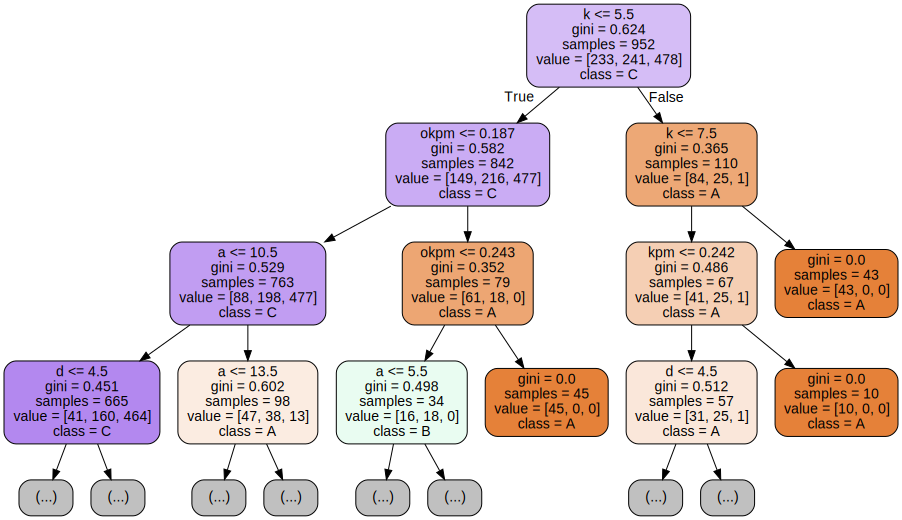

In [ ]:
import graphviz

dot_data = tree.export_graphviz(clf
                ,feature_names= cols
                ,max_depth=3
                ,class_names=["A","B","C"]
                ,filled=True
                ,rounded=True
                ,out_file=None
          )
graph = graphviz.Source(dot_data)
graph

In [ ]:
# rule based
# Xtrain, Xtest, Ytrain, Ytest
Xtrain_A = Xtrain.loc[Ytrain == 'A']
Xtrain_B = Xtrain.loc[Ytrain == 'B']
Xtrain_C = Xtrain.loc[Ytrain == 'C']
print(Xtrain_A.shape)
print(Xtrain_B.shape)
print(Xtrain_C.shape)


(233, 5)
(241, 5)
(478, 5)


In [ ]:
def learn_one_rule(dataset):
  rule = pandas.DataFrame(index=range(2), columns=range(5))
  for i in range(5):
    rule[i][0] = dataset[cols[i]].max()
    rule[i][1] = dataset[cols[i]].min()
  return rule

ruleA = learn_one_rule(Xtrain_A)
ruleB = learn_one_rule(Xtrain_B)
ruleC = learn_one_rule(Xtrain_C)

In [ ]:
from numpy.ma.core import true_divide

def apply_rule(test, ruleA, ruleB, ruleC):
  conditions = [
    ((test[cols[0]] >= ruleB[0][0]) | 
                (test[cols[1]] >= ruleB[1][0]) |
                (test[cols[2]] >= ruleB[2][0]) |
                (test[cols[3]] >= ruleB[3][0]) |
                (test[cols[4]] >= ruleB[4][0]) ),
    ((test[cols[0]] >= ruleC[0][0]) | 
                (test[cols[1]] >= ruleC[1][0]) |
                (test[cols[2]] >= ruleC[2][0]) |
                (test[cols[3]] >= ruleC[3][0]) |
                (test[cols[4]] >= ruleC[4][0]) ),
      True
  ]
  values = ['A','B','C']
  test['performance'] = np.select(conditions, values)

#apply the rule
apply_rule(Xtest, ruleA, ruleB, ruleC)
#calculate the accuracy
accuracy_number = len(Xtest.loc[Ytest==Xtest['performance']])
accuracy = accuracy_number / len(Xtest)
print(accuracy)

0.7352941176470589
